# Introduction

Problem Statement:
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

Breakdown of the Problem Statement:
Supervised machine learning problem.
The target value will be Item_Outlet_Sales.

Aim of the NoteBook:
The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from feature_engine.imputation import RandomSampleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [30]:
df=pd.read_csv('Train.csv')

# Dataset exploration

In [31]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8038,DRK12,9.50,LF,0.042123,Soft Drinks,32.0900,OUT017,2007,NaN,Tier 2,Supermarket Type1,432.770
5667,FDF59,12.50,Low Fat,0.071355,Starchy Foods,125.7020,OUT049,1999,Medium,Tier 1,Supermarket Type1,2530.040
5865,DRH51,17.60,Low Fat,0.097368,Dairy,89.3856,OUT049,1999,Medium,Tier 1,Supermarket Type1,878.856
2652,FDV57,15.25,Regular,0.065897,Snack Foods,179.2660,OUT046,1997,Small,Tier 1,Supermarket Type1,1438.128
7938,FDV50,14.30,Low Fat,0.122571,Dairy,122.3730,OUT046,1997,Small,Tier 1,Supermarket Type1,985.384


In [32]:
df.shape

(8523, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [36]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [37]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Preprocessing and Data Analysis




In [38]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [39]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [40]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [41]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

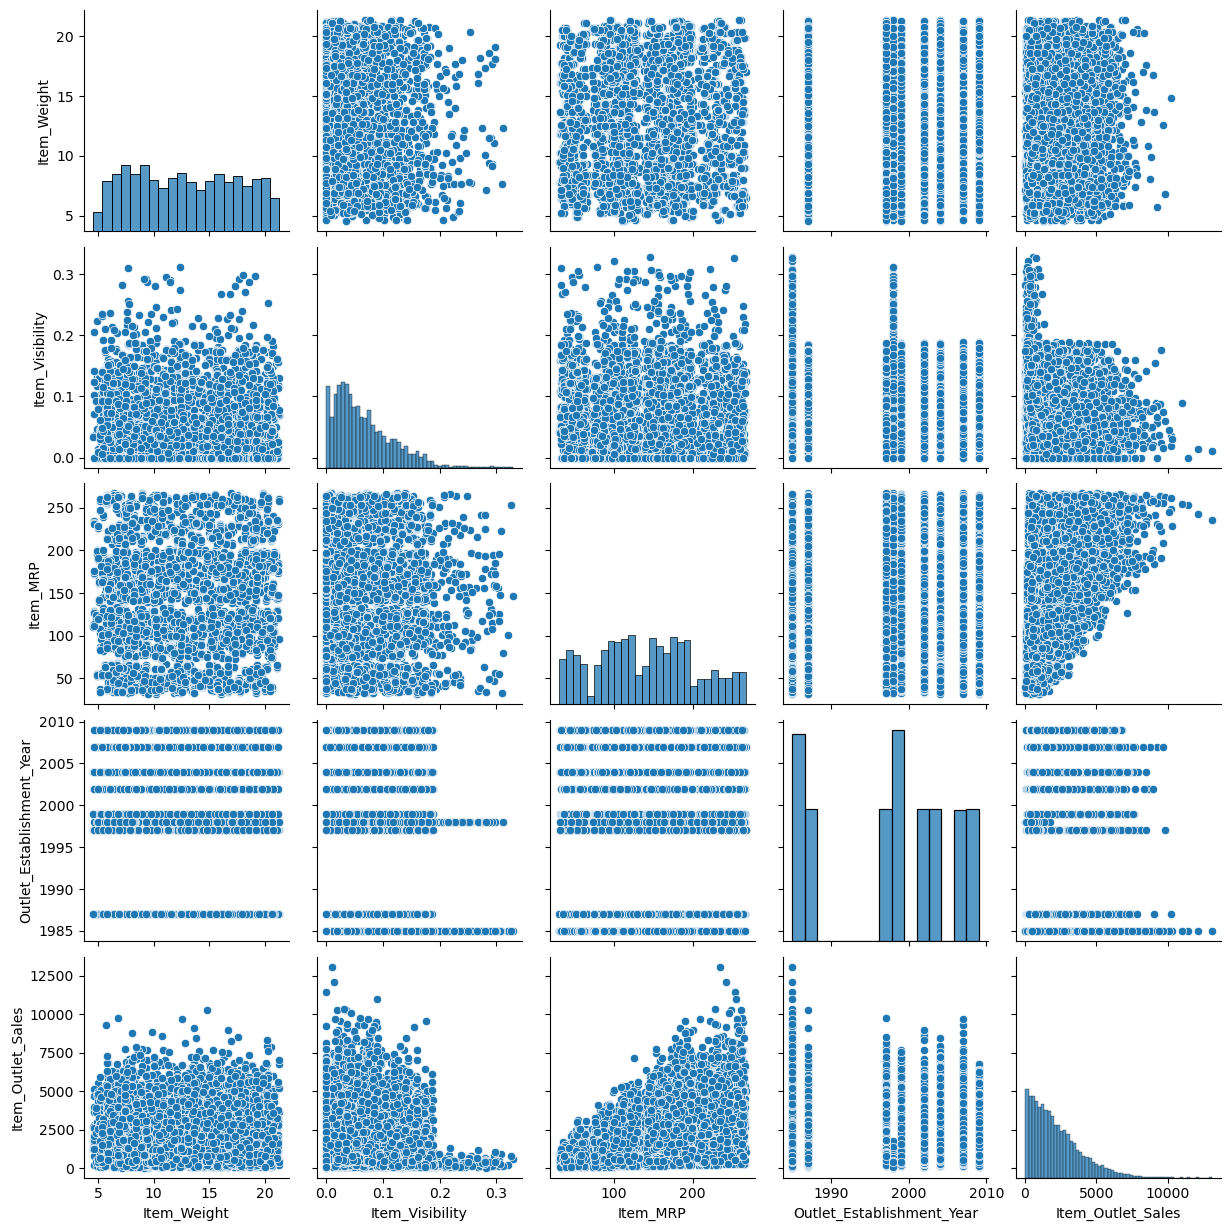

In [42]:
sns.pairplot(df)

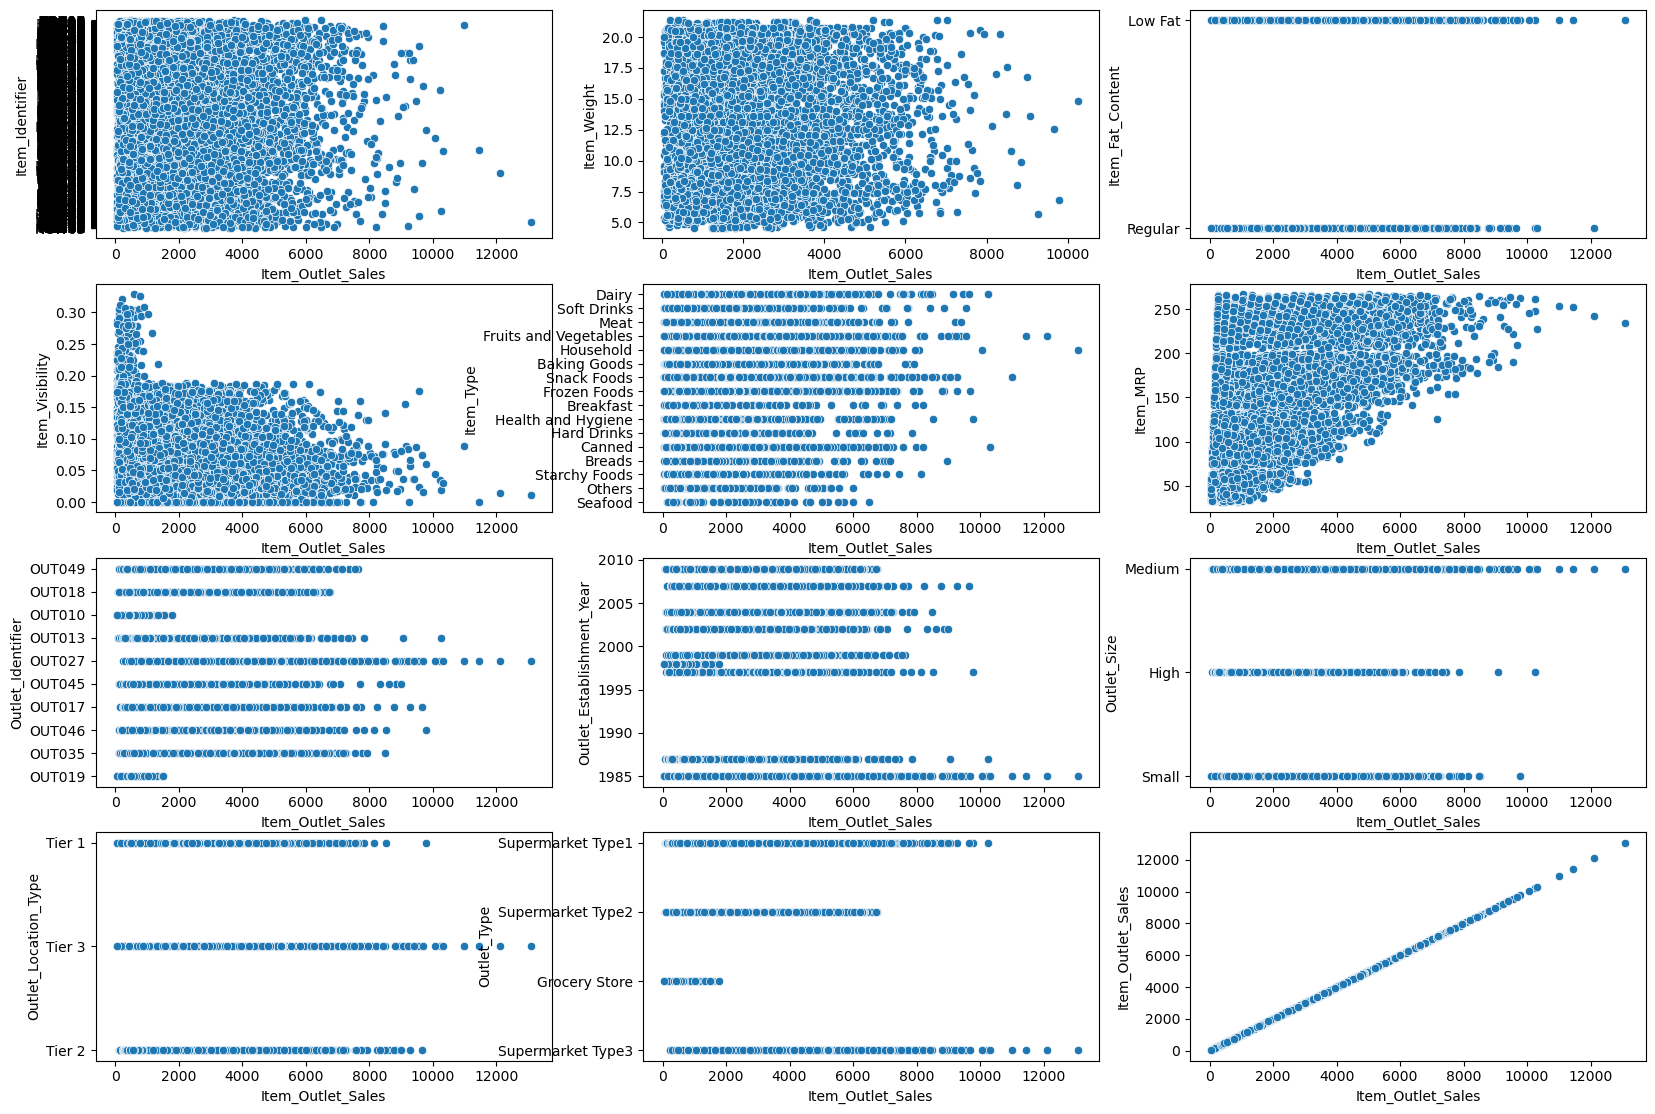

In [43]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df):
    plt.subplot(10,3,i+1)
    sns.scatterplot(df,x='Item_Outlet_Sales',y=col)

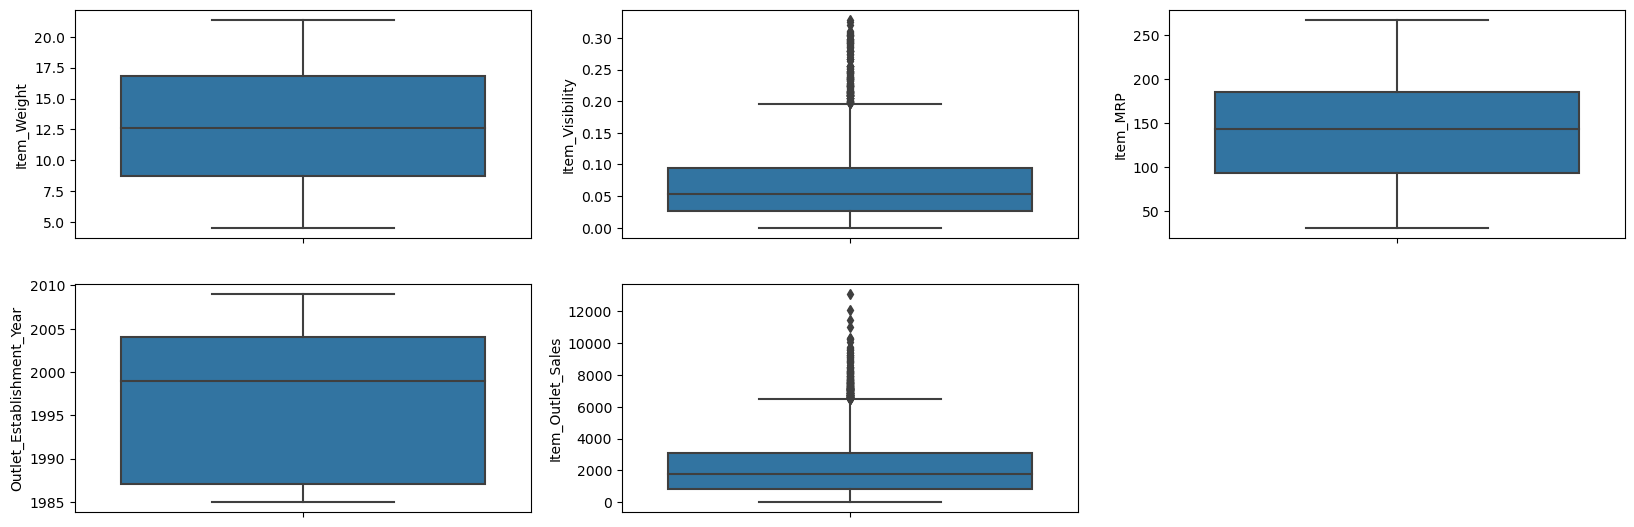

In [44]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(10,3,i+1)
    sns.boxplot(df,y=col)

In [45]:
df[df['Item_Weight'].isnull()]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [46]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [47]:
df=df.drop('Item_Identifier',axis=1)

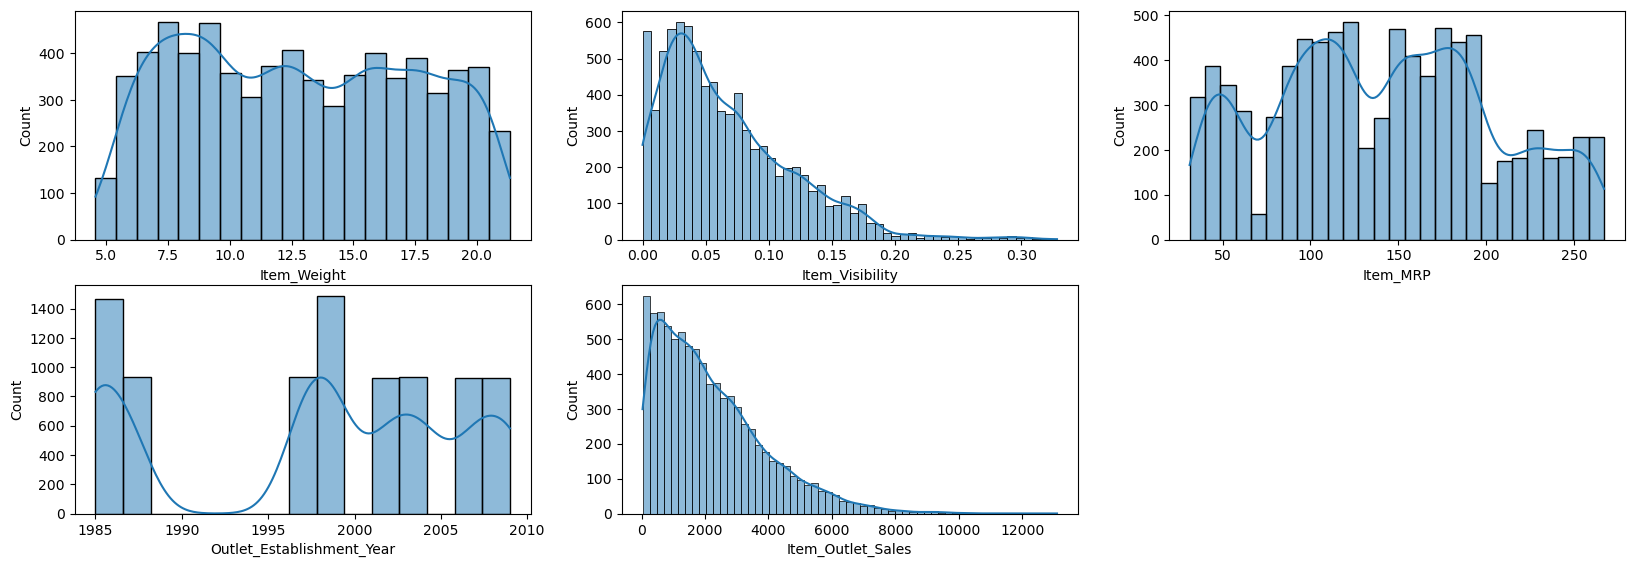

In [48]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(10,3,i+1)
    sns.histplot(df,x=col,kde=True)

In [49]:
df.skew()

C:\Users\deves\AppData\Local\Temp\ipykernel_10388\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [50]:
for i in df.select_dtypes(exclude='object'):
    df[i]=np.log1p(df[i])
    

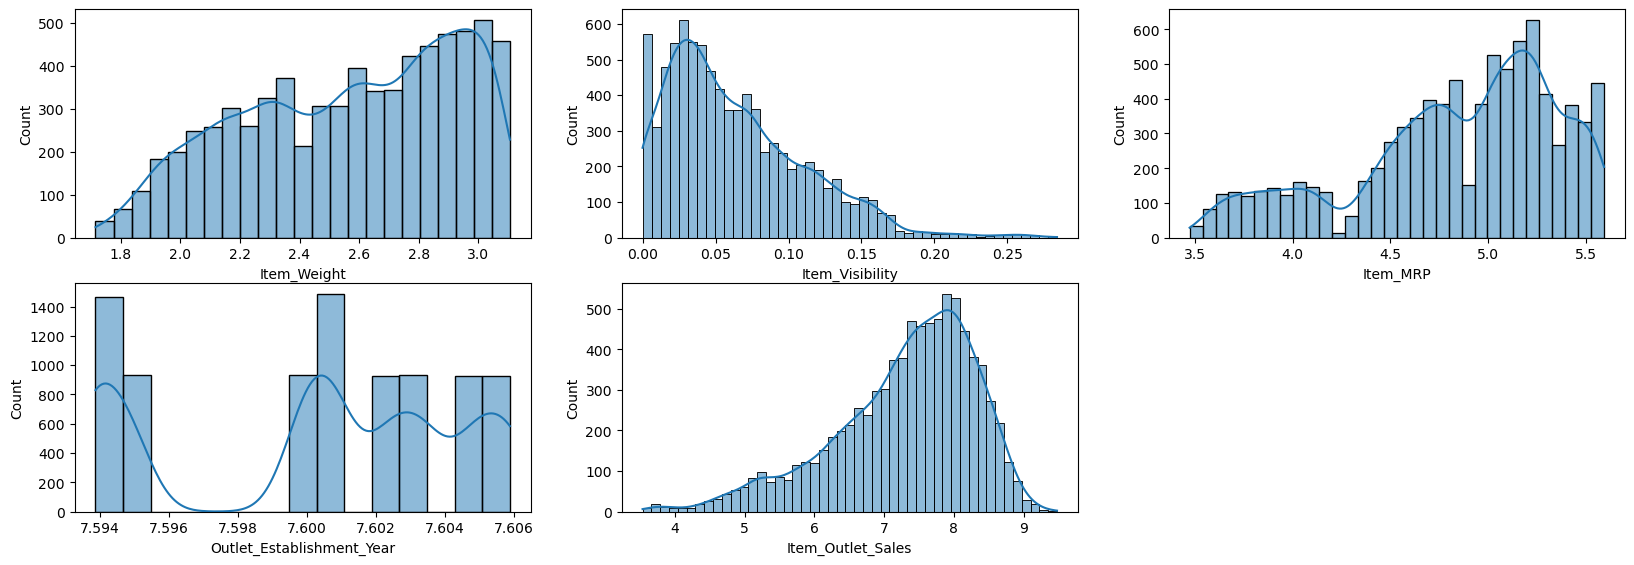

In [51]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(10,3,i+1)
    sns.histplot(df,x=col,kde=True)

In [52]:
df.skew()

C:\Users\deves\AppData\Local\Temp\ipykernel_10388\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                 -0.348430
Item_Visibility              1.015334
Item_MRP                    -0.726014
Outlet_Establishment_Year   -0.400638
Item_Outlet_Sales           -0.882266
dtype: float64

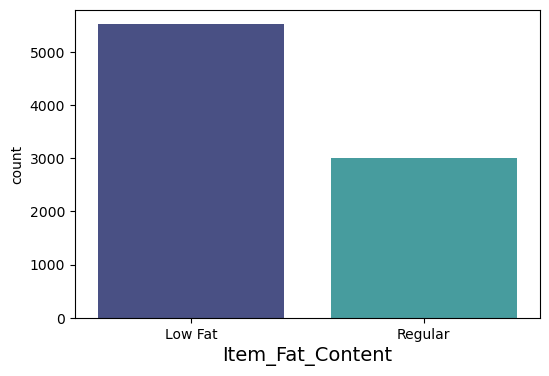

In [53]:

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

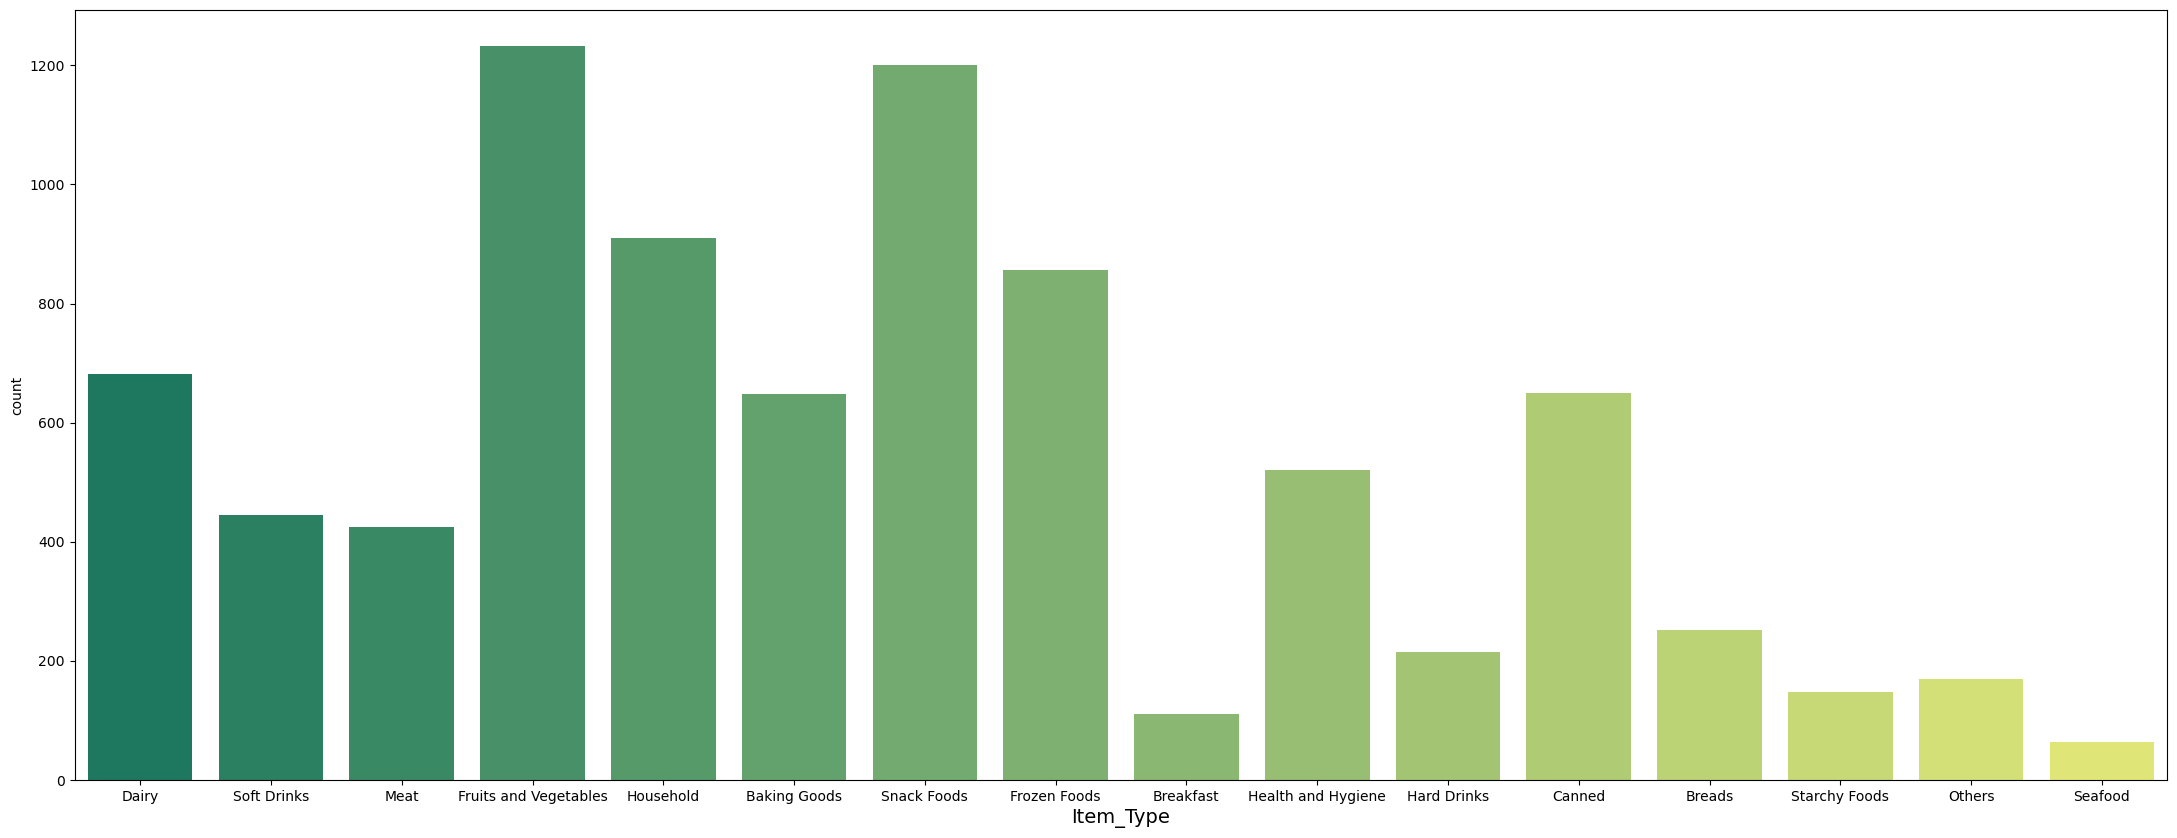

In [54]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

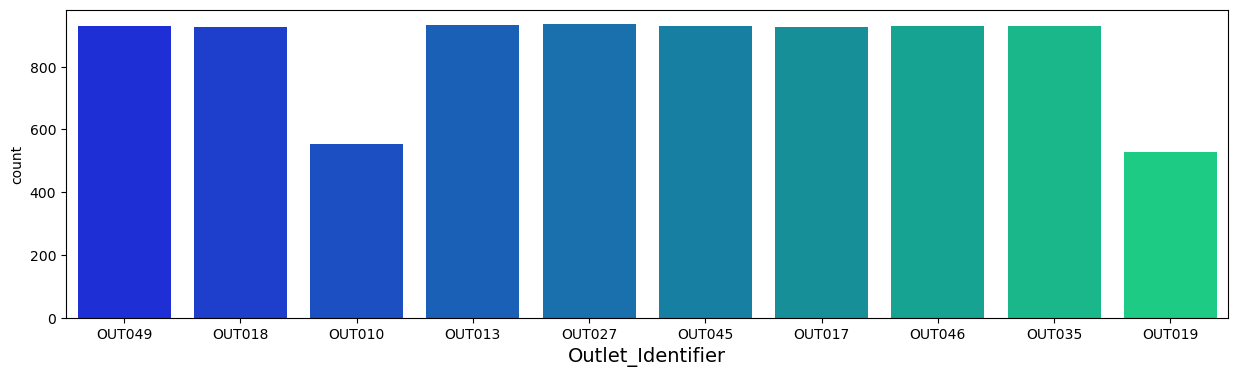

In [55]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

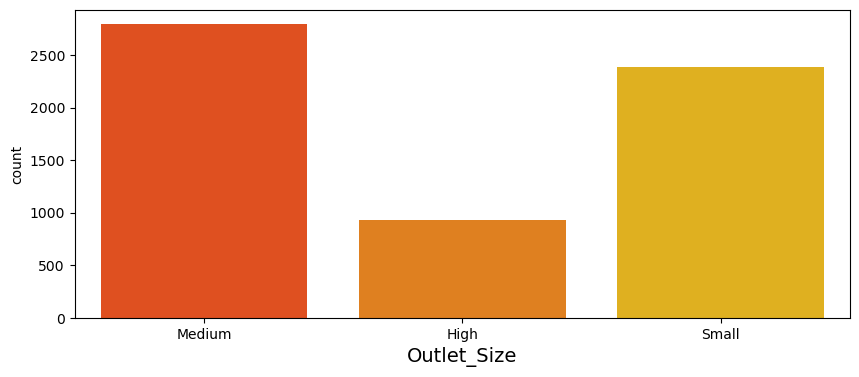

In [56]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

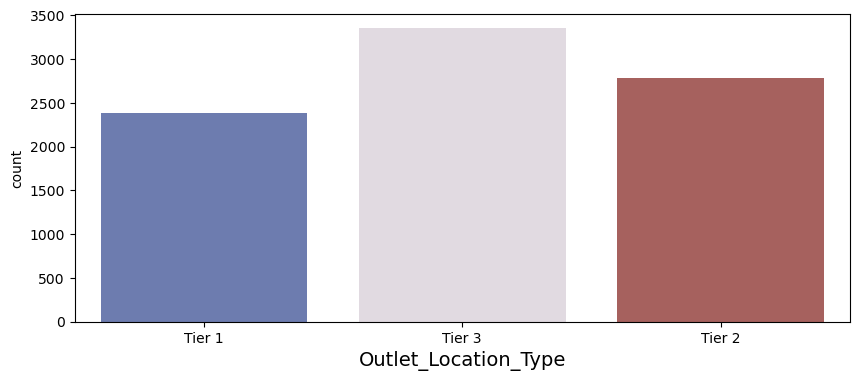

In [57]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

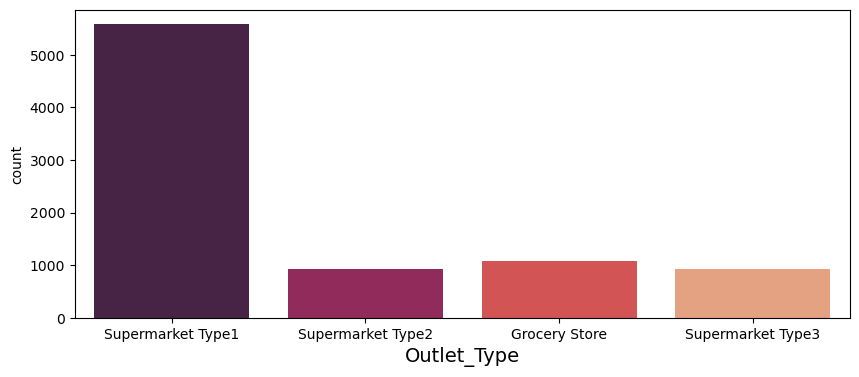

In [58]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()



* `Item_Fat_Content` - Most items sold are low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`.
* `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower.
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data.
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:

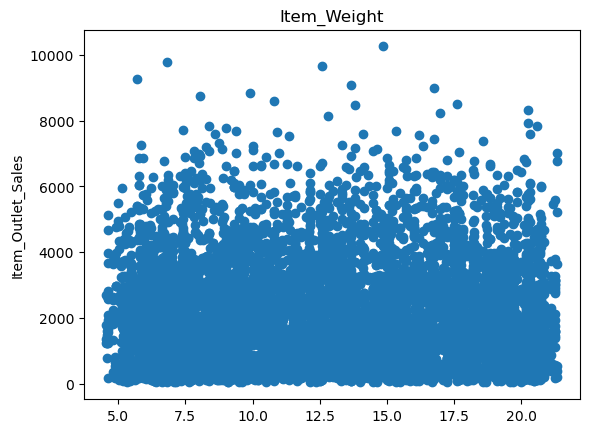

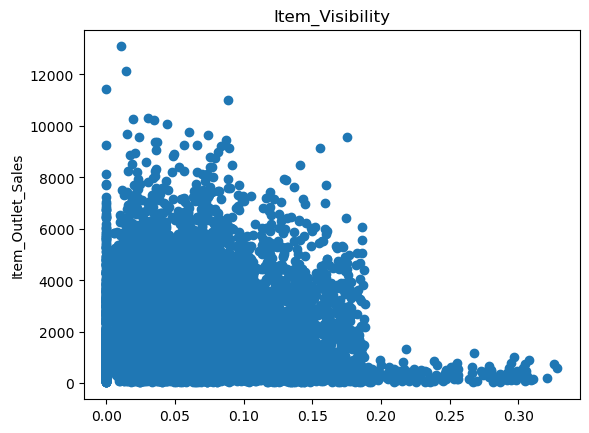

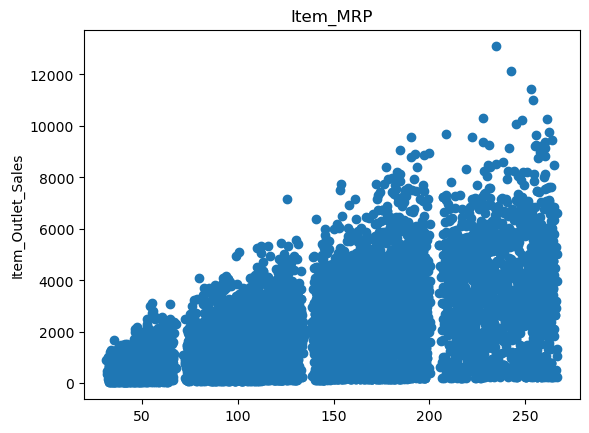

In [59]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

* `Item_Weight` - The data is very spreaded, no specific pattern.
* `Item_Visibility` - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
* `Item_MRP` - Items with higher MRP tend to sell better in most cases.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


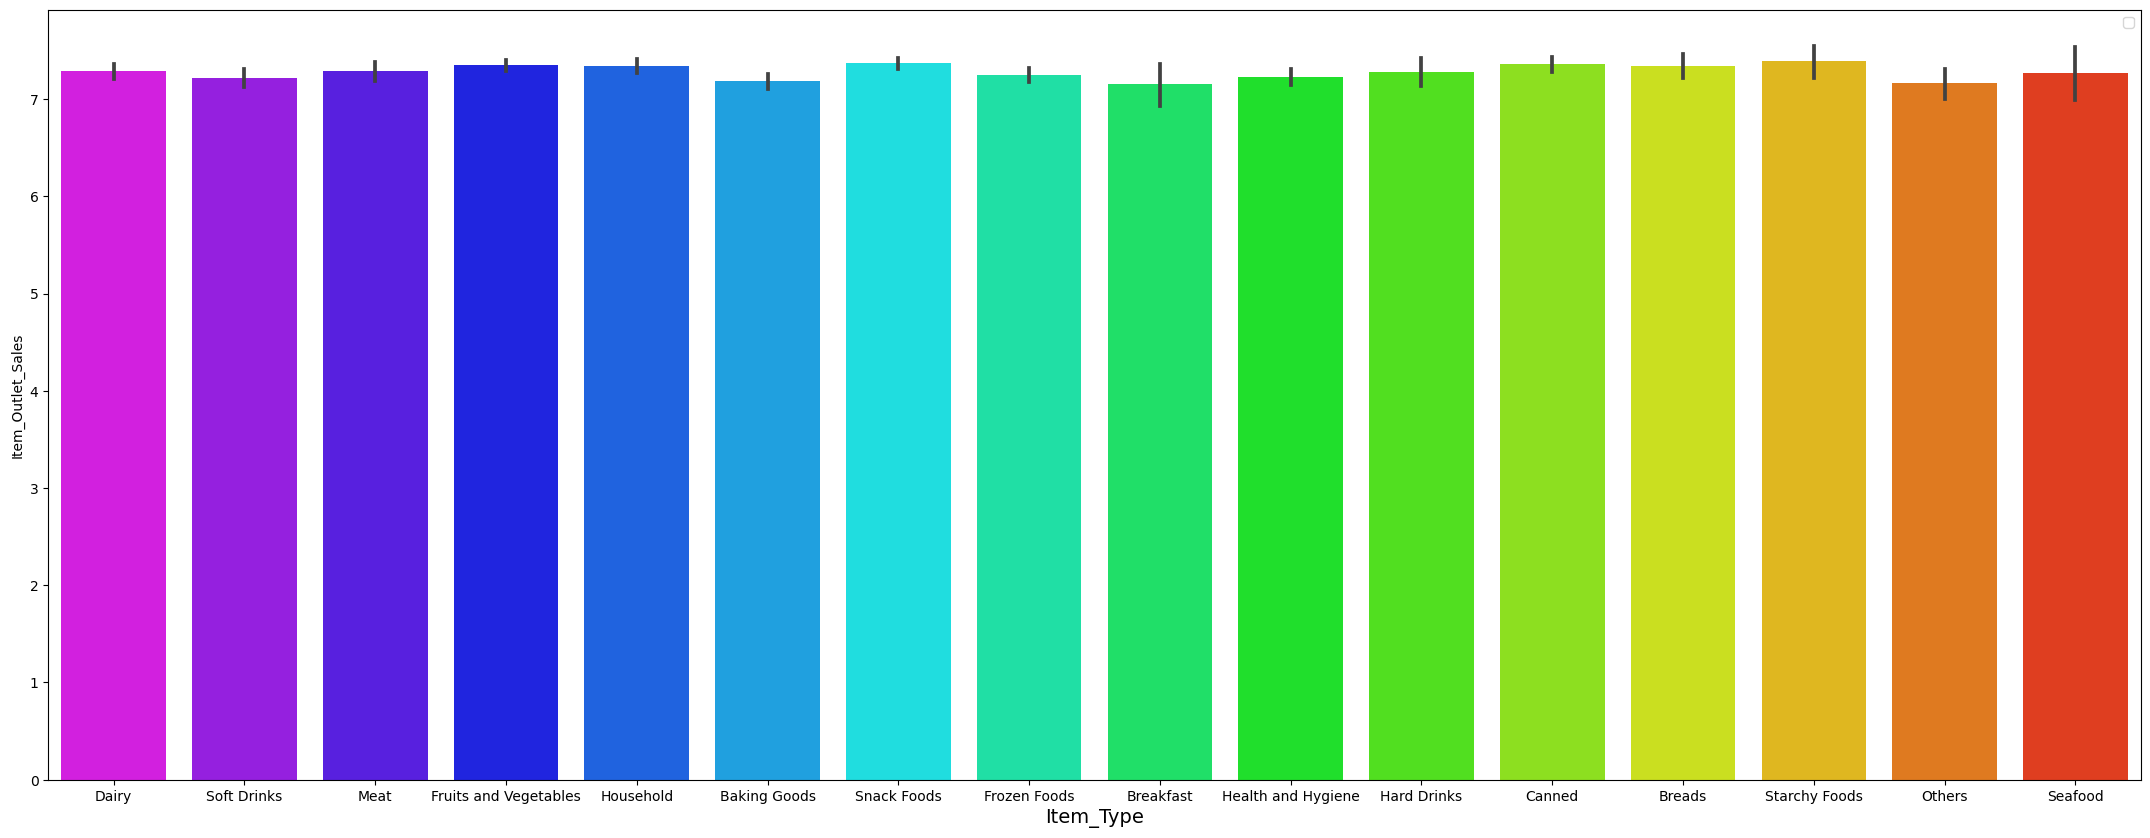

In [60]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=df ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


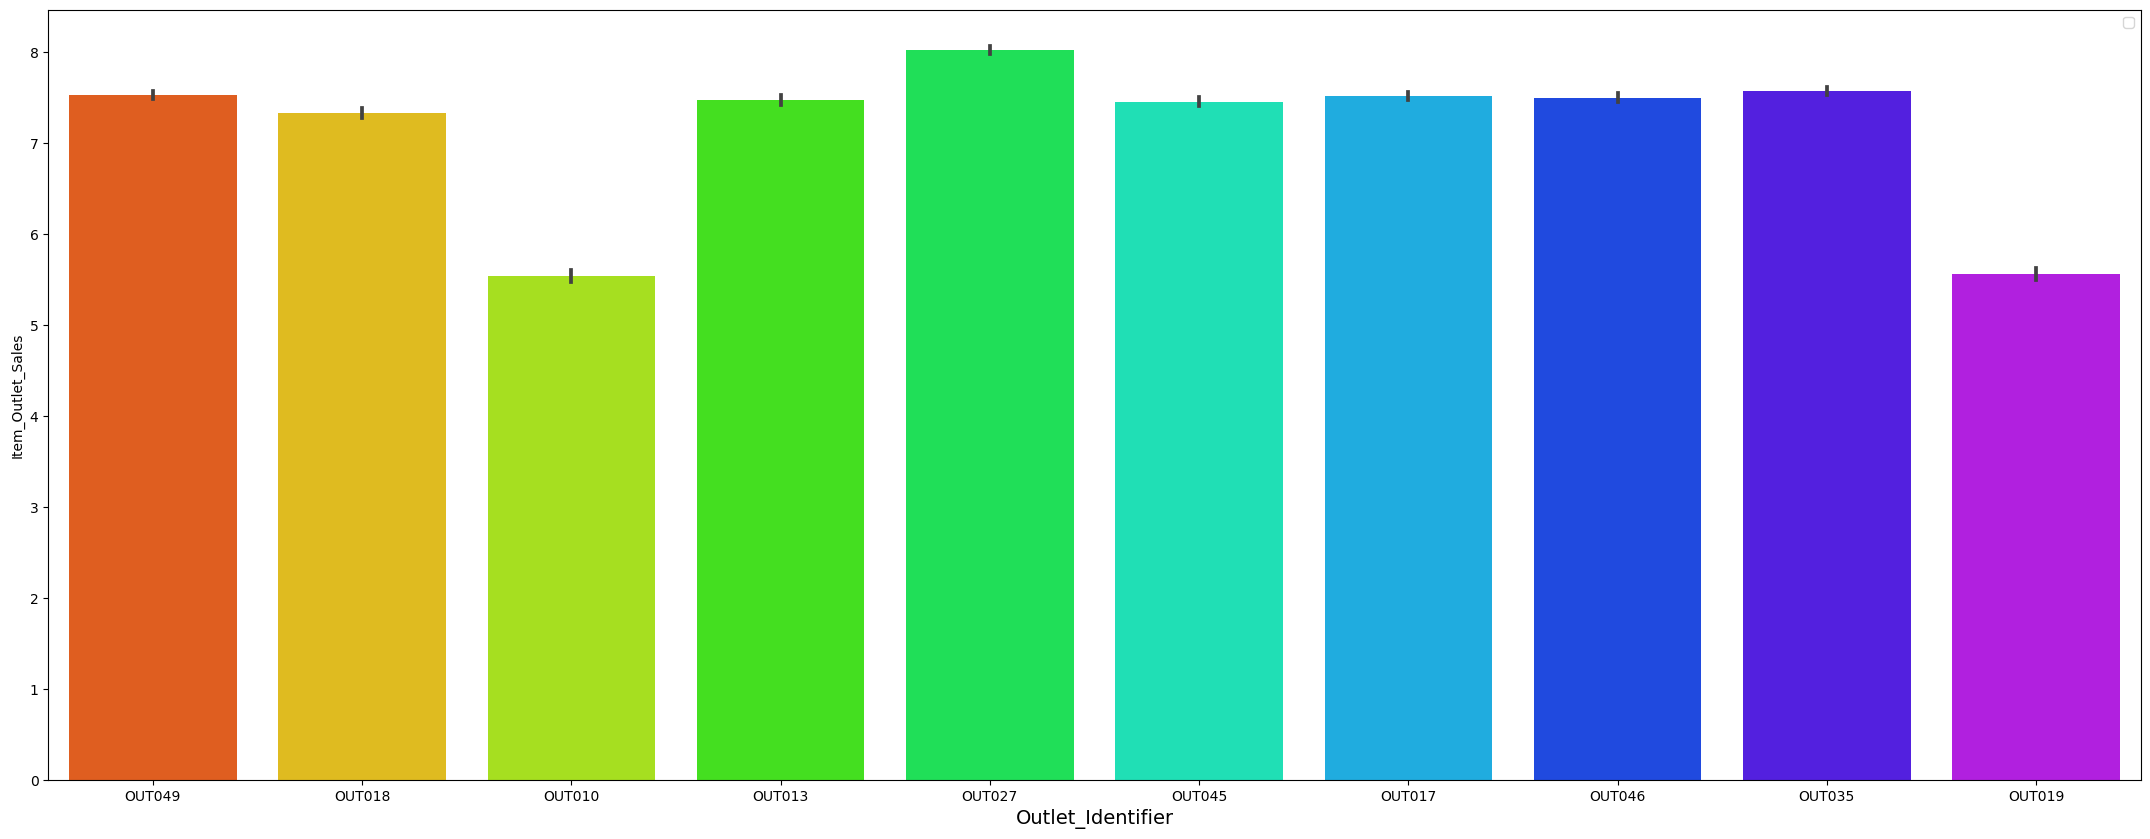

In [61]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=df ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


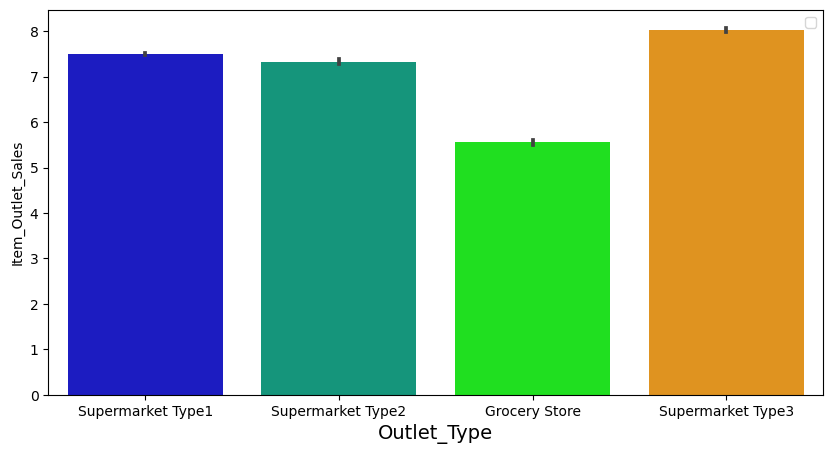

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=df ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


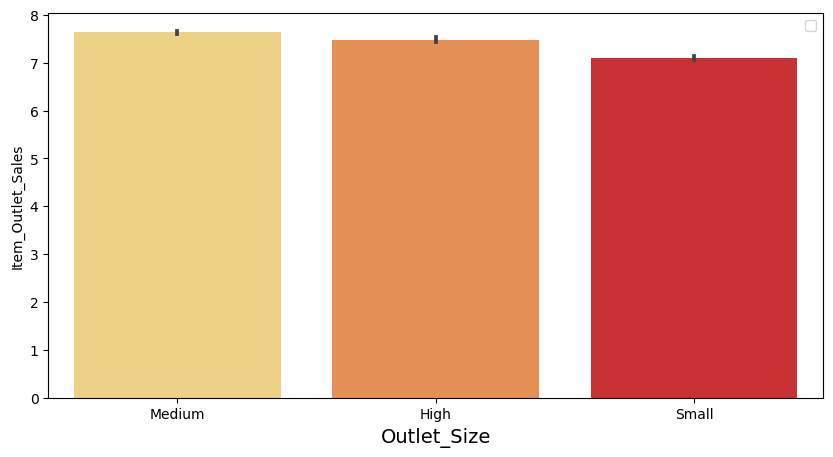

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=df ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


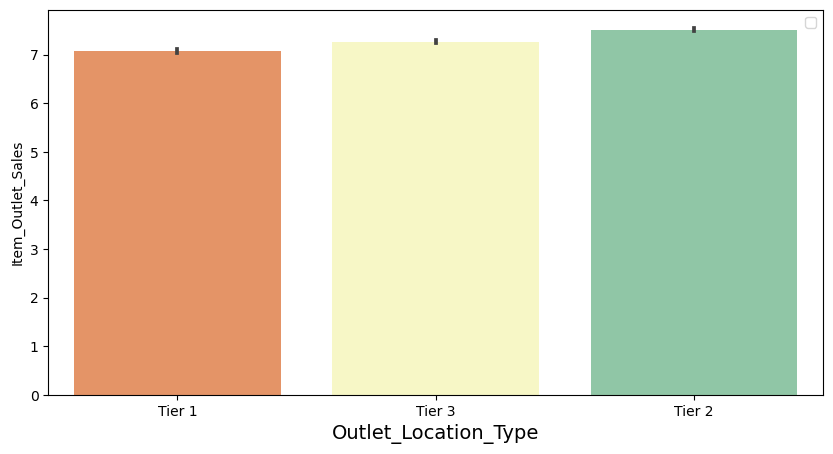

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()



* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and high outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

C:\Users\deves\AppData\Local\Temp\ipykernel_10388\2851535179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,cmap='rocket')


<Axes: >

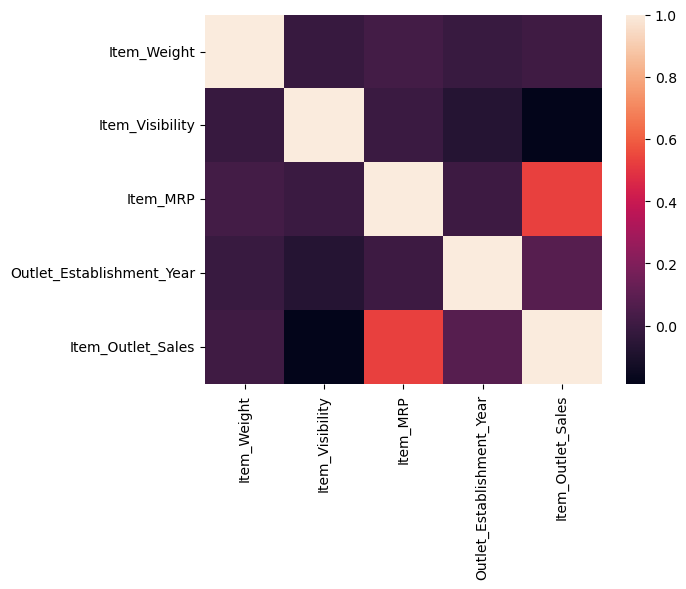

In [65]:

sns.heatmap(df.corr() ,cmap='rocket')

# Outliers Removal

In [66]:
for col in df.select_dtypes(exclude='object'):
    data=df[col]
    
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    
    IQR=Q3-Q1
    Min=Q1-(1.5*IQR)
    Max=Q3+(1.5*IQR)
    
    Outliers= ((data > Max) | (data < Min))
    
    df.loc[Outliers,col]=np.nan
    

# One Hot Encoding

In [67]:
df=pd.get_dummies(df,drop_first=True)

# Imputation

In [68]:
knn_imp = KNNImputer(n_neighbors=3,weights='distance')

In [69]:
df=pd.DataFrame(knn_imp.fit_transform(df),columns=df.columns)

In [70]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,2.332144,0.015920,5.524692,7.600902,8.225808,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.934416,0.019095,3.897299,7.605890,6.096776,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.917771,0.016621,4.960170,7.600902,7.648868,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.005683,0.000000,5.210005,7.600402,6.597664,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.295560,0.000000,4.004810,7.594884,6.903451,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,2.062423,0.055230,5.373062,7.594884,7.929984,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8519,2.238580,0.045912,4.692787,7.602401,6.310436,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8520,2.451005,0.034581,4.455770,7.603399,7.085159,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8521,2.105353,0.135597,4.645671,7.605890,7.521100,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [71]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermark

In [72]:
X=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

# Standardization

In [73]:
X = MinMaxScaler().fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# Data Modeling

In [75]:
ridge=Ridge(alpha=1).fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
linear=LinearRegression().fit(X_train,y_train)

In [76]:
models=[ridge,lasso,enet,linear]
for i in models:
    print('Accuracy Score for',i,i.score(X_train,y_train))

Accuracy Score for Ridge(alpha=1) 0.7200172900447637
Accuracy Score for Lasso() 0.0
Accuracy Score for ElasticNet() 0.0
Accuracy Score for LinearRegression() 0.7200202928609409


In [77]:
y_pred=linear.predict(X_test)
print('Linear R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Linear R2 0.6081223174498109
MAE is: 0.40264005826699417


In [78]:
y_pred=ridge.predict(X_test)
print('Ridge R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Ridge R2 0.6067603640767398
MAE is: 0.4026544497708218


In [79]:
y_pred=enet.predict(X_test)
print('Elastic net R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Elastic net R2 -1.1503437618753933e+30
MAE is: 0.7652562096174632


In [80]:
y_pred=lasso.predict(X_test)
print('Lasso R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Lasso R2 -1.1503437618753933e+30
MAE is: 0.7652562096174632


In [81]:
rfg=RandomForestRegressor().fit(X_train,y_train)
print('Accuracy Score for',rfg.score(X_train,y_train))
print('RFG R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

Accuracy Score for 0.9572527908230136
RFG R2 -1.1503437618753933e+30
MAE is: 0.7652562096174632


In [82]:
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=7)
xgb=xgb_model.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print('XGB R2',r2_score(y_pred,y_test))
print('MAE is:',mean_absolute_error(y_pred,y_test))

XGB R2 0.5845763170095042
MAE is: 0.4185937292339079




* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	and Ridge Regressor have the best perfomance in most categories.
* Random Forest regressor showed overfitting. It performed really good on training data but failed with testing data
* For better peformance these models need tuning e.g. Grid Search.